# Ch.1　Positive Definite Kernel

In [1]:
# The programs in Chapter 1 assume that the following are executed.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

## 1.1　Positive Definiteness of Matrices

### 例1

In [2]:
n = 3
B = np.random.normal(size=n**2).reshape(3, 3)
A = np.dot(B.T, B)
values, vectors = np.linalg.eig(A)
print("values:\n", values, "\n\nvectors:\n", vectors, "\n")

values:
 [5.58033647 0.36012415 0.10513477] 

vectors:
 [[-0.6937627  -0.61449679 -0.37561551]
 [-0.44063179 -0.05038287  0.89627294]
 [ 0.56968144 -0.78730887  0.23581307]] 



In [3]:
S = []
for i in range(10):
    z = np.random.normal(size=n)
    y = np.squeeze(z.T.dot(A.dot(z)))
    S.append(y)
    if (i+1) % 5 == 0:
        print("S[%d:%d]:" % ((i-4), i), S[i-4:i])

S[0:4]: [5.78562806041902, 17.090887816360777, 1.7272794782006209, 0.34262381293469635]
S[5:9]: [0.5393292279246817, 1.8403586162222538, 6.637680607670867, 7.746748480262234]


## 1.2　カーネル

### 例2

<ipython-input-4-d641966baab3>:20: RuntimeWarning: invalid value encountered in double_scalars
  return S / T


Text(0.5, 1.0, 'Nadaraya-Watson Estimator')

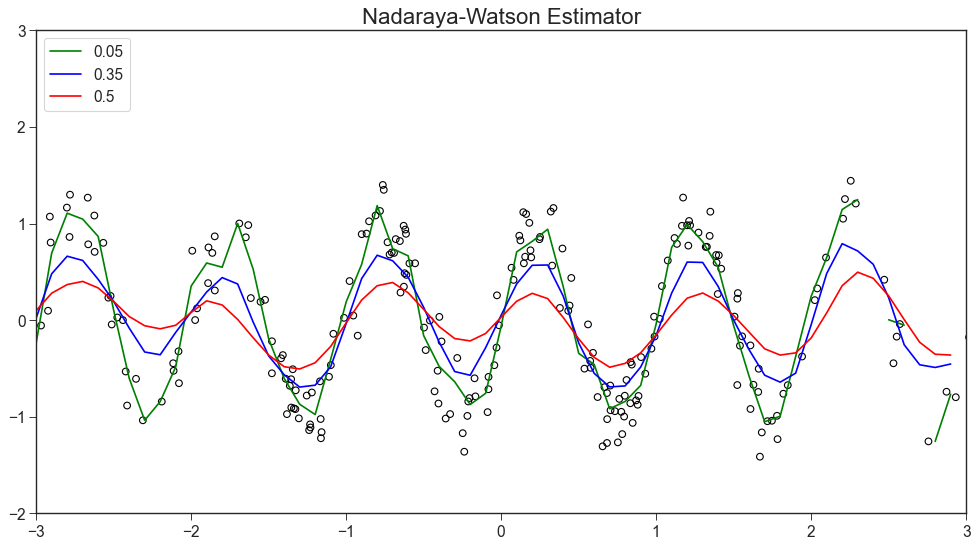

In [4]:
n = 250
x = 2 * np.random.normal(size=n)
y = np.sin(2 * np.pi * x) + np.random.normal(size=n) / 4  # データ生成


def D(t):          # 関数定義 D
    return np.maximum(0.75 * (1 - t**2), 0)


def k(x, y, lam):  # 関数定義 K
    return D(np.abs((x - y) / lam))


def f(z, lam):     # 関数定義 f
    S = 0
    T = 0
    for i in range(n):
        S = S + k(x[i], z, lam) * y[i]
        T = T + k(x[i], z, lam)
    return S / T


plt.figure(num=1, figsize=(15, 8), dpi=80)
plt.xlim(-3, 3)
plt.ylim(-2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")

xx = np.arange(-3, 3, 0.1)
yy = [[] for _ in range(3)]
lam = [0.05, 0.35, 0.50]
color = ["g", "b", "r"]
for i in range(3):
    for zz in xx:
        yy[i].append(f(zz, lam[i]))
    plt.plot(xx, yy[i], c=color[i], label=lam[i])

plt.legend(loc="upper left", frameon=True, prop={"size": 14})
plt.title("Nadaraya-Watson Estimator", fontsize=20)

## 1.3　正定値カーネル

### 例12

In [5]:
def K(x, y, sigma2):
    return np.exp(-np.linalg.norm(x - y)**2 / 2 / sigma2)


def F(z, sigma2):  # 関数定義 f
    S = 0
    T = 0
    for i in range(n):
        S = S + K(x[i], z, sigma2) * y[i]
        T = T + K(x[i], z, sigma2)
    return S / T

Text(0.5, 1.0, 'Nadaraya-Watson Estimator')

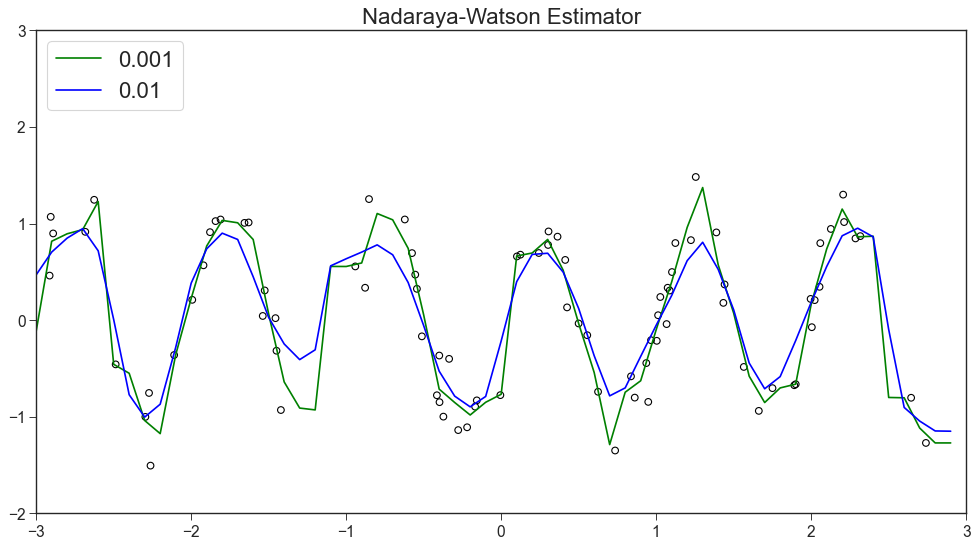

In [6]:
n = 100
x = 2 * np.random.normal(size=n)
y = np.sin(2 * np.pi * x) + np.random.normal(size=n) / 4  # データ生成

# sigma2 = 0.01, 0.001 の曲線の図示
plt.figure(num=1, figsize=(15, 8), dpi=80)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")
plt.xlim(-3, 3)
plt.ylim(-2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
xx = np.arange(-3, 3, 0.1)
yy = [[] for _ in range(2)]
sigma2 = [0.001, 0.01]
color = ["g", "b"]

for i in range(2):
    for zz in xx:
        yy[i].append(F(zz, sigma2[i]))
    plt.plot(xx, yy[i], c=color[i], label=sigma2[i])
plt.legend(loc="upper left", frameon=True, prop={"size": 20})
plt.title("Nadaraya-Watson Estimator", fontsize=20)

In [7]:
# 最適な lambda の値の計算
m = int(n / 10)
sigma2_seq = np.arange(0.001, 0.01, 0.001)
SS_min = np.inf
for sigma2 in sigma2_seq:
    SS = 0
    for k in range(10):
        test = range(k*m, (k+1)*m)
        train = [x for x in range(n) if x not in test]
        for j in test:
            u, v = 0, 0
            for i in train:
                kk = K(x[i], x[j], sigma2)
                u = u + kk * y[i]
                v = v + kk
            if v != 0:
                z = u / v
                SS = SS + (y[j] - z)**2
    if SS < SS_min:
        SS_min = SS
        sigma2_best = sigma2
print("Best sigma2 =", sigma2_best)

Best sigma2 = 0.009000000000000001


Text(0.5, 1.0, 'Nadaraya-Watson Estimator')

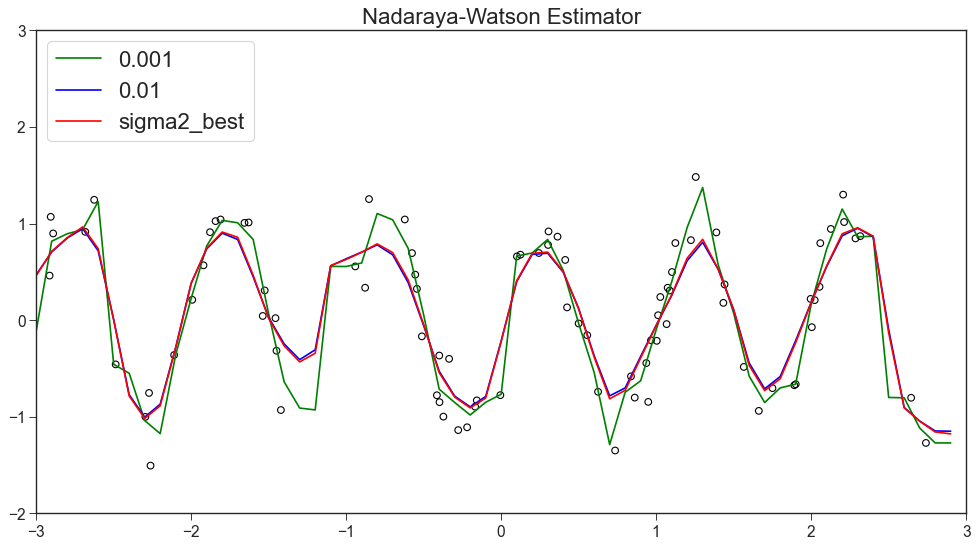

In [8]:
plt.figure(num=1, figsize=(15, 8), dpi=80)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")
plt.xlim(-3, 3)
plt.ylim(-2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

xx = np.arange(-3, 3, 0.1)
yy = [[] for _ in range(3)]
sigma2 = [0.001, 0.01, sigma2_best]
labels = [0.001, 0.01, "sigma2_best"]
color = ["g", "b", "r"]

for i in range(3):
    for zz in xx:
        yy[i].append(F(zz, sigma2[i]))
    plt.plot(xx, yy[i], c=color[i], label=labels[i])
plt.legend(loc="upper left", frameon=True, prop={"size": 20})
plt.title("Nadaraya-Watson Estimator", fontsize=20)

## 1.4　確率

## 1.5　Bochner の定理

## 1.6　文字列，木，グラフのカーネル

### 例21（文字列カーネル）

In [9]:
def string_kernel(x, y):
    m, n = len(x), len(y)
    S = 0
    for i in range(m):
        for j in range(i, m):
            for k in range(n):
                if x[(i-1):j] == y[(k-1):(k+j-i)]:
                    S = S + 1
    return S

In [10]:
C = ["a", "b", "c"]
m = 10
w = np.random.choice(C, m, replace=True)
x = ""
for i in range(m):
    x = x + w[i]
n = 12
w = np.random.choice(C, n, replace=True)
y = ""
for i in range(n):
    y = y + w[i]

In [11]:
x

'abaaacbbbc'

In [12]:
y

'cbbbabbccbbb'

In [13]:
string_kernel(x, y)

65

### 例22（木カーネル）

In [14]:
def C(i, j):
    S, T = s[i], t[j]
# 木 s の頂点 i もしくは木 t の頂点 j のラベルが一致しない場合，0 を返す。
    if S[0] != T[0]:
        return 0
# 木 s の頂点 i もしくは木 t の頂点 j が子孫を持たない場合，0 を返す。
    if S[1] is None:
        return 0
    if T[1] is None:
        return 0
    if len(S[1]) != len(T[1]):
        return 0
    U = []
    for x in S[1]:
        U.append(s[x][0])
        U1 = sorted(U)
    V = []
    for y in T[1]:
        V.append(t[y][0])
        V1 = sorted(V)
    m = len(U)
# 子孫のラベルが一致しない場合，0 を返す。
    for h in range(m):
        if U1[h] != V1[h]:
            return 0
    U2 = np.array(S[1])[np.argsort(U)]
    V2 = np.array(T[1])[np.argsort(V)]
    W = 1
    for h in range(m):
        W = W * (1 + C(U2[h], V2[h]))
        return W

In [15]:
def k(s, t):
    m, n = len(s), len(t)
    kernel = 0
    for i in range(m):
        for j in range(n):
            if C(i, j) > 0:
                kernel = kernel + C(i, j)
    return kernel

In [16]:
s = [[] for _ in range(6)]
s[0] = ["G", [1, 3]]
s[1] = ["T", [2]]
s[2] = ["C", None]
s[3] = ["A", [4, 5]]
s[4] = ["C", None]
s[5] = ["T", None]

t = [[] for _ in range(9)]
t[0] = ["G", [1, 4]]
t[1] = ["A", [2, 3]]
t[2] = ["C", None]
t[3] = ["T", None]
t[4] = ["T", [5, 6]]
t[5] = ["C", None]
t[6] = ["A", [7, 8]]
t[7] = ["C", None]
t[8] = ["T", None]

for i in range(6):
    for j in range(9):
        if C(i, j) > 0:
            print(i, j, C(i, j))

0 0 2
3 1 1
3 6 1


In [17]:
k(s, t)

4

### 例23（グラフカーネル）

In [18]:
def k(s, p):
    return prob(s, p) / len(node)


def prob(s, p):
    if len(node[s[0]]) == 0:
        return 0
    if len(s) == 1:
        return p
    m = len(s)
    S = (1 - p) / len(node[s[0]]) * prob(s[1:m], p)
    return S

In [19]:
node = [[] for _ in range(5)]
node[0] = [2, 4]
node[1] = [4]
node[2] = [1, 5]
node[3] = [1, 5]
node[4] = [3]
k([0, 3, 2, 4, 2], 1 / 3)

0.0016460905349794243